In [871]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import pickle

In [872]:
df_test = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/test_data.csv')
df_20f = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/20_featured_training_data.csv')
df_train = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/Preprocessed_DF.csv')

print("test shape" , df_test.shape)
print("train shape" , df_train.shape)
df_20f.shape

test shape (1012, 96)
train shape (5314, 99)


(5314, 20)

In [873]:
index = df_train['Index']
target = df_train['Bankrupt?']
cluster = df_train['Cluster']
df_train = df_train.drop(columns=['Index','Bankrupt?','Cluster'])

In [874]:
df_test = df_test.drop(columns=['Index'])
df_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.414323,0.481029,0.468280,0.609514,0.609514,0.998889,0.797159,0.809132,0.303290,0.781361,...,0.761704,0.001404,0.623973,0.609512,0.838286,0.275450,0.026749,0.564950,1,0.136203
1,0.497441,0.560892,0.546603,0.610660,0.610660,0.999108,0.797545,0.809431,0.303506,0.781691,...,0.815244,0.004466,0.623724,0.610658,0.842427,0.285886,0.026965,0.565870,1,0.018871
2,0.501584,0.548899,0.556721,0.606134,0.606134,0.999034,0.797427,0.809370,0.303453,0.781657,...,0.806318,0.000684,0.625387,0.606132,0.840598,0.275816,0.026793,0.565165,1,0.095511
3,0.574465,0.637375,0.619680,0.600376,0.600376,0.999030,0.797528,0.809426,0.303640,0.781691,...,0.852655,0.001718,0.624151,0.600375,0.844727,0.279977,0.026795,0.565178,1,0.028513
4,0.393360,0.456444,0.440334,0.600009,0.600009,0.998800,0.797025,0.809000,0.303240,0.781206,...,0.741604,0.002545,0.623612,0.600009,0.835578,0.279901,0.026623,0.564204,1,0.028779


In [875]:
# Load the high correlation features from the highcorr.pkl file
high_corr_features = joblib.load('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/high_corr_features.pkl')

# Drop the high correlation features from df_test
df_test = df_test.drop(columns=high_corr_features)

# Display the updated shape of df_test
df_test.shape

(1012, 78)

In [876]:
scaler = joblib.load('data_trainin_scaler.pkl')
scaler.transform(df_test)

array([[-1.49817608, -1.18614059,  0.08897915, ..., -0.02714728,
         0.        ,  1.80389297],
       [-0.13116919,  0.03045077,  0.15446832, ...,  0.0516525 ,
         0.        , -0.58858317],
       [-0.06301928, -0.15224554, -0.10419326, ..., -0.00869706,
         0.        ,  0.97416941],
       ...,
       [ 1.23824301,  0.42407827,  0.05602865, ...,  0.01337595,
         0.        , -0.28484655],
       [-0.75574301, -0.31252004, -0.35091028, ..., -0.0183832 ,
         0.        ,  0.01085689],
       [-0.04618225, -0.06588002,  0.13222676, ...,  0.0176536 ,
         0.        , -0.25599594]])

In [877]:
from sklearn.model_selection import train_test_split

# Load the features from the df_02.pkl file
final_features = joblib.load('final_columns.pkl')

# Load the scaler
scaler = joblib.load('data_trainin_scaler.pkl')

# Keep only the features present in df_02.pkl in df_test
df_test = df_test[df_20f.columns]
df_train = df_train[df_20f.columns]

print(df_test.shape)
df_train.shape

(1012, 20)


(5314, 20)

In [878]:
# Split df_train and target into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

Training set shape: (3719, 20), Validation set shape: (1595, 20)


In [879]:
# Number of bankrupt companies in validation data
num_bankrupt_in_val = (y_val == 1).sum()
print(f"Number of bankrupt companies in validation data: {num_bankrupt_in_val}")

# Number of bankrupt companies in training data
num_bankrupt_in_train = (y_train == 1).sum()
print(f"Number of bankrupt companies in training data: {num_bankrupt_in_train}")


Number of bankrupt companies in validation data: 42
Number of bankrupt companies in training data: 109


In [880]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier



base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('nn', MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)),
]


meta_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Update stacked_model with the best estimator from grid search
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit each base model on the training data
for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_train)
    cm_base = confusion_matrix(y_train, y_pred_base)
    TT_base = cm_base[1, 1]
    TF_base = cm_base[1, 0]
    acc_base = TT_base / (TT_base + TF_base) if (TT_base + TF_base) > 0 else 0
    print(f"\n{name} - TT: {TT_base}, TF: {TF_base}, Accuracy (acc) for bankrupt companies: {acc_base:.4f}")

# Fit the stacked model on the training data
stacked_model.fit(X_train, y_train)

# For meta model
y_pred_meta = stacked_model.predict(X_train)
cm_meta = confusion_matrix(y_train, y_pred_meta)
TT_meta = cm_meta[1, 1]
TF_meta = cm_meta[1, 0]
acc_meta = TT_meta / (TT_meta + TF_meta) if (TT_meta + TF_meta) > 0 else 0
print(f"\nMeta model - TT: {TT_meta}, TF: {TF_meta}, Accuracy (acc) for bankrupt companies: {acc_meta:.4f}")

# Evaluate the model on the validation set
validation_score = stacked_model.score(X_val, y_val)
print(f'Validation accuracy: {round(validation_score, 3)}')


rf - TT: 109, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

xgb - TT: 109, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000


c:\Users\abdul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



nn - TT: 3, TF: 106, Accuracy (acc) for bankrupt companies: 0.0275


c:\Users\abdul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abdul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abdul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abdul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:37:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr


Meta model - TT: 97, TF: 12, Accuracy (acc) for bankrupt companies: 0.8899
Validation accuracy: 0.975


In [881]:
from sklearn.metrics import confusion_matrix, classification_report

# Print accuracy
print(f'Validation accuracy: {round(validation_score, 3)}')

# Generate predictions for the validation set
y_val_preds = stacked_model.predict(X_val)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_preds))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_preds))

Validation accuracy: 0.975
Confusion Matrix:
[[1545    8]
 [  32   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1553
           1       0.56      0.24      0.33        42

    accuracy                           0.97      1595
   macro avg       0.77      0.62      0.66      1595
weighted avg       0.97      0.97      0.97      1595



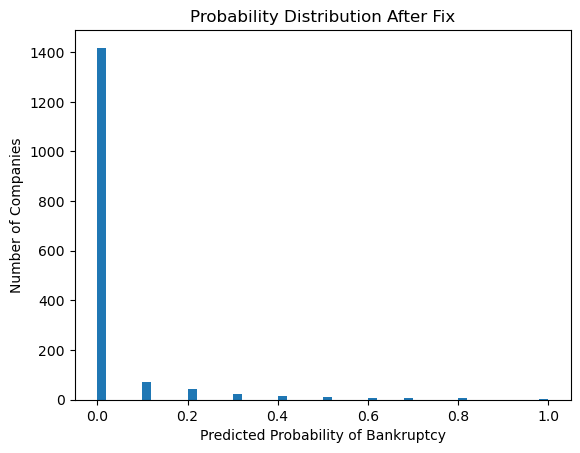

In [882]:
import matplotlib.pyplot as plt

y_val_proba = stacked_model.predict_proba(X_val)[:, 1]
plt.hist(y_val_proba, bins=50)
plt.title("Probability Distribution After Fix")
plt.xlabel("Predicted Probability of Bankruptcy")
plt.ylabel("Number of Companies")
plt.show()

In [883]:
import numpy as np

# Predict probabilities for class 1 (bankrupt)
test_proba = stacked_model.predict_proba(df_test)[:, 1]

best_thresh = 0.40
final_test_preds = (test_proba >= best_thresh).astype(int)

from collections import Counter
print("Final Prediction Counts:", Counter(final_test_preds))

Final Prediction Counts: Counter({0: 983, 1: 29})


In [884]:
# Indices of rows in the test data where y_pred equals 1
indices_y_test_1 = [i for i, final_test_preds in enumerate(final_test_preds) if final_test_preds == 1]
print("Indices in test data where y_pred = 1:")
print(indices_y_test_1)

Indices in test data where y_pred = 1:
[37, 64, 65, 160, 231, 233, 283, 311, 379, 386, 433, 462, 476, 483, 503, 527, 538, 547, 580, 681, 707, 758, 801, 807, 817, 828, 950, 970, 993]
